# Importación de librerías

In [ ]:
# Pybalu
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 261 (delta 152), reused 177 (delta 74), pack-reused 0
Receiving objects: 100% (261/261), 68.46 KiB | 9.78 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43704 sha256=3eaea4d68ec9164f9c43b97657cd8596938fa9f54e5a1bbe63fd7a38ac386db2
  Stored in directory: /tmp/pip-ephem-wheel-cache-kypld3kv/wheels/9e/f6/a9/3d39da83a3504331129d706f5b04ceb3dbf0ec0f313cdb8fcf
Successfully built balu3


In [ ]:
from   balu3.fx.chr    import lbp, gabor
from   balu3.cl.basics import ClassifierKNN
from   balu3.fs.sel    import clean
from   balu3.ft.norm   import minmax

In [ ]:
# General

import os
import gdown

# Manejo de matrices

import numpy as np

# Procesamiento de imágenes

from   skimage.color                 import rgb2gray
from   skimage.transform             import warp_polar
import cv2


# Visualización

import matplotlib.pyplot as plt

# Extracción

from skimage.feature                 import greycomatrix, greycoprops

# Transformación de características

from sklearn.decomposition           import TruncatedSVD, PCA
from sklearn.preprocessing           import StandardScaler

# Selección de características
from sklearn.feature_selection       import SequentialFeatureSelector, SelectKBest, f_regression

# Clasificadores

from   sklearn.neighbors             import NearestCentroid, KNeighborsClassifier
from   sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from   sklearn.tree                  import DecisionTreeClassifier
from   sklearn.neighbors             import KNeighborsClassifier
from   sklearn.linear_model          import LogisticRegression
from   sklearn.naive_bayes           import GaussianNB
from   sklearn.neural_network        import MLPClassifier
from   sklearn.svm                   import SVC

# Ensamblaje

from   sklearn.ensemble              import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier

# Optimización de hiper-parámetros

from   sklearn.model_selection       import GridSearchCV, RandomizedSearchCV

# Distribuciones probabilidad

from scipy.stats                     import uniform, randint

# Desempeño

from   sklearn.metrics               import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Selección de modelos
from sklearn.model_selection         import cross_val_score, StratifiedKFold, train_test_split, ShuffleSplit

# Extracción e Importación de Features
Para obtener las features sin realizar la extracción nuevamente, **se puede saltar la sección de Extracción de Features y correr solo la sección de Importanción de Features.**


## Extracción de Features

#### Cargado de Imágenes

In [ ]:
# Imágenes en bruto
!wget https://www.dropbox.com/s/s4opefjionbdbab/G00.zip
!unzip -qq G00.zip

!wget https://www.dropbox.com/s/zur2wxzcce4qlgf/G01.zip
!unzip -qq G01.zip

# Imagenes ya procesadas
!gdown 1lm4O8ku4LRTr8huvWEUBKwJ4JondB6kc
!gdown 1l7QHX0VzZz4UDtnS-8gbVRGRb22rxGYy

!unzip -d G00-processed G00-processed.zip
!unzip -d G01-processed G01-processed.zip

# Features de entrenamiento
!gdown 1aku3tID_ksmcVm8uX-LyutQDM796qxWu

--2023-06-26 05:44:20--  https://www.dropbox.com/s/s4opefjionbdbab/G00.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/s4opefjionbdbab/G00.zip [following]
--2023-06-26 05:44:20--  https://www.dropbox.com/s/raw/s4opefjionbdbab/G00.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc302d4594c0daeb9f115c8d29a8.dl.dropboxusercontent.com/cd/0/inline/B-vGzYFoC6R5TLveCSPP-SORfGYZWb_aZBh_SMUuK9J9vw_jvVe3jjq4InBD-VdbniL_DAZHmVhXRxlt0Ov9TbSbmry0I9H8wBbJEtFOSVVplTjL2elyJ_1CB-dS8GoDBFRTCCEt7LiGjAI84di-vssd6LCUL8jbUPR4r4u4bJaK-Q/file# [following]
--2023-06-26 05:44:20--  https://uc302d4594c0daeb9f115c8d29a8.dl.dropboxusercontent.com/cd/0/inline/B-vGzYFoC6R5TLveCSPP-SORfGYZWb_aZBh_SMUuK9J9vw_jvVe3jjq4InBD-VdbniL_DAZHmVhXRxlt0Ov9TbSbmry0I9H

In [ ]:
# # Funcion auxiliar: sacada de balu3.io.misc

# def num2fixstr(x,d):
#     st = '%0*d' % (d,x)
#     return st

# def readImages(origin:str = "train", rgb=True, dig_clase = 3, dig_img = 3,
#                prefix = 'ID', n_clases=90, echo=False):
#   """
#   In: especificación de la clase de imágenes a leer (train, test)
#   Out: np.array con imagenes del set elegido y otro con las respectivas clasees
#   """
#   # retorna
#   if rgb:
#     imread_flag = cv2.IMREAD_COLOR
#   else:
#     imread_flag = cv2.IMREAD_GRAYSCALE

#   if origin == 'train':
#     fpath = 'G00-processed'
#     N = 12 # Cantidad de img por clase en train
#     rango = range(1, 13)

#   elif origin == 'test':
#     fpath = 'G01-processed'
#     N = 4 # Cantidad de img por clase en test
#     rango = range(13, 17)

#   else:
#     raise TypeError("origin debe especificar si es clase train o test")

#   img_prefix = fpath + '/' + prefix
#   img_list = []
#   img_class = []

#   for k in range(n_clases):
#     for n in rango:
#       clase = k+1 # Clase actual
#       num_img = n # N Imagen actual
#       path = f'{img_prefix}{num2fixstr(clase, dig_clase)}_{num2fixstr(num_img, dig_img)}.png'
#       img = cv2.imread(path, imread_flag)
#       if rgb:
#         img = np.transpose(img, (2, 0, 1))
#       img_list.append(img)
#       img_class.append(clase)

#   if echo:
#     print(f"Carga de set de imágenes <{origin}> en formato {'rgb' if rgb else 'gris'} finalizada")

#   return np.array(img_list), np.array(img_class)

In [ ]:
# # rawdata_X es un np.array de arrays. Cada elemento es una imagen.
# rawdata_test, y_test = readImages('test', rgb=RGB, echo=True)
# rawdata_train, y_train = readImages('train', rgb=RGB, echo=True)

# print('Raw Data Training shape:', rawdata_train.shape)
# print('Raw Data Testing shape:', rawdata_test.shape)

#### Prepocesamiento

##### Funciones

In [ ]:
# Funcion auxiliar: sacada de balu3.io.misc
def num2fixstr(x,d):
    st = '%0*d' % (d,x)
    return st

In [ ]:
def iris_polar_warp(img, rightcrop=True, rgb=True):
  """
  Transform segmented image of iris into square
  Input:
    img: numpy.array 2D (grayscale) or 3D (rgb, hsv)
  Output:
    transformed: numpy.array
  """
  if not rgb:
    transformed = warp_polar(img, scaling='linear', channel_axis=None)
    if rightcrop:
      transformed = transformed[:,:266]
  else:
    transformed = warp_polar(img, scaling='linear', channel_axis=2)
    if rightcrop:
      transformed = transformed[:,:266, :]
  return transformed

In [ ]:
def import_images(path:str,
                  rgb:bool      = True,
                  n_clases:int  = 90,
                  dig_class:int = 3,
                  dig_image:int = 3,
                  prefix:str    = 'ID'
                  ):
  """
  input: path of the folder (G00, G01 or G02)
          rgb is a bool if you want to extract or not the colors
          description of how is saved the information of the images
  output: np.array's with the images and their class
  """

  imread_flag = cv2.IMREAD_COLOR if rgb else cv2.IMREAD_GRAYSCALE


  if 'G00' in path:
    N = 12 # number of images in train G00
    rango = range(1, 13)

  elif 'G01' in path:
    N = 4 # number of images in test G01
    rango = range(13, 17)

  elif 'G02' in path:
    N = 4 # number of images in test G02
    rango = range(17, 21)

  else:
    raise TypeError("You must specify the class you want to process (G00, G01 or G02)")

  imprefix = path + '/' + prefix
  img_list = []
  img_class = []

  for k in range(n_clases):
    num_class = k+1

    for num_img in rango:
      path = f'{imprefix}{num2fixstr(num_class, dig_class)}_{num2fixstr(num_img, dig_image)}.png'
      img = cv2.imread(path, imread_flag)

      img_list.append(img)
      img_class.append(num_class)

  return np.array(img_list), np.array(img_class)

In [ ]:
def save_images(images_array,
                folder_path,
                number_of_classes:int = 90,
                dig_class:int = 3,
                dig_image:int = 3,
                prefix:str = "ID"
                ):

  if not os.path.exists(folder_path):
    os.makedirs(folder_path)

  if 'G00' in folder_path:
    size_of_classes = 12 # Cantidad de img por clase en train G00
    class_range = range(1, 13)

  elif 'G01' in folder_path:
    size_of_classes = 4 # Cantidad de img por clase en test G01
    class_range = range(13, 17)

  elif 'G02' in folder_path:
    size_of_classes = 4 # Cantidad de img por clase en test G02
    class_range = range(17, 21)

  image_i = 0
  for class_i in range(number_of_classes):
    for image_number in class_range:
      save_path = f'{folder_path}/{prefix}{num2fixstr(class_i+1, dig_class)}_' + \
                  f'{num2fixstr(image_number, dig_image)}.png'
      cv2.imwrite(save_path, images_array[image_i])
      image_i += 1

  print(f"Saved {image_i} images in {folder_path}")

In [ ]:
def set_images_format(img_array, rgb:bool = True, right_crop:bool = True, echo=False):
  """
  input: array with all the images without processing
          bool if you want the image to be in color (rgb) or gray
          bool if want to crop the right side of the image
  out: np.array with the images processed
  """
  processed_imgs = []

  if echo:
    print(f"Warping {'and croping ' if right_crop else ''}{len(img_array)} images")
  for img in img_array:
    clean_img = 255 * iris_polar_warp(img, rightcrop=right_crop, rgb=rgb)

    processed_imgs.append(clean_img)

  return np.array(processed_imgs)

##### Ejecución del procesamiento de imágenes

Para no tener que procesar el total de imágenes, se dejó comentado el código de las celdas cuyo procesamiento ya fue realizado e importado con anterioridad. Se realizará la carga de imagenes ya procesadas de forma directa.

In [ ]:
# RGB = True
# g00_img, y_train = import_images('G00', rgb=RGB)
# g01_img, y_test = import_images('G01', rgb=RGB)

In [ ]:
# format_data_train = set_images_format(g00_img, echo=True, rgb=RGB)
# format_data_test  = set_images_format(g01_img, echo=True, rgb=RGB)

In [ ]:
# save_images(format_data_train, 'G00-format')
# save_images(format_data_test, 'G01-format')

In [ ]:
# RGB = False
# rawdata_train, y_train = import_images('G00-format', rgb=RGB)
# rawdata_test, y_test = import_images('G01-format', rgb=RGB)

In [ ]:
RGB = False
rawdata_train, y_train = import_images('G00-processed', rgb=RGB)
rawdata_test, y_test = import_images('G01-processed', rgb=RGB)

(360, 266)


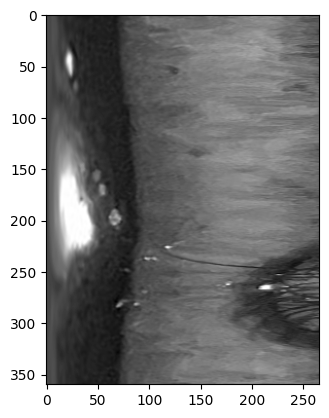

In [ ]:
TESTING_IMAGE = rawdata_test[13]
print(TESTING_IMAGE.shape)

if RGB:
  b1 = TESTING_IMAGE[:,:,0] # get blue channel
  g1 = TESTING_IMAGE[:,:,1] # get green channel
  r1 = TESTING_IMAGE[:,:,2] # get red channel

  fig, ax = plt.subplots(1,3)
  ax[0].imshow(r1, cmap='Reds')
  ax[1].imshow(g1, cmap='Greens')
  ax[2].imshow(b1, cmap='Blues')
  ax[0].title.set_text('R')
  ax[1].title.set_text('G')
  ax[2].title.set_text('B')

else:
  gray = TESTING_IMAGE[:,:]
  fig, ax = plt.subplots(1,1)
  ax.imshow(gray, cmap='gray')

plt.show()

### Features Vistos en Clases

#### LBP

Se extraen las características de las imágenes de train y se guardan en cada matriz correspondiente (Xlbp_train, etc). Luego se concatenan en X_train. Después de este bloque, se obtiene X_train con las características del set de imágenes de entrenamiento (G00) y X_test para las de testing (G01). Como ya están separados, no es necesario ocupar SplitTrainTest()

##### Funciones

In [ ]:
def get_features(images, rgb:bool, class_size:int, n_clases:int = 90, hdiv:int = 2, vdiv:int = 2, mapping:str = "nri_uniform"):

  Mlbp = 59 * hdiv * vdiv

  if RGB:
    X = np.zeros((n_clases * class_size, Mlbp, 3))
  else:
    X = np.zeros((n_clases * class_size, Mlbp))

  print(f"Extrayendo características de imagen en {'rgb' if rgb else 'gris'}")

  for t, img in enumerate(images):
      # Se extraen las características de las imágenes de train y se guardan en cada matriz correspondiente

      if RGB:
        X[t,:,0] = lbp(img[0], hdiv=hdiv, vdiv=vdiv, mapping='nri_uniform')
        X[t,:,1] = lbp(img[1], hdiv=hdiv, vdiv=vdiv, mapping='nri_uniform')
        X[t,:,2] = lbp(img[2], hdiv=hdiv, vdiv=vdiv, mapping='nri_uniform')
      else:
        X[t,:] = lbp(img, hdiv=hdiv, vdiv=vdiv, mapping='nri_uniform')

  if RGB:
    X = np.concatenate((X[:,:,0], X[:,:,1], X[:,:,2]), axis=1)

  return X

##### Parámetros

In [ ]:
features_extraction_done = False

# Elegir que feats extraer: LBP, HoG, Gabor, Haralick, geom, etc
K       = 90                # NUMERO DE CLASES
N_train = 12                # numero de imagenes por clase para matriz de train
N_test  = 4                 # numero de imagenes por clase para matriz de test
hdiv    = 4                 # número de particiones horizontales
vdiv    = 4                 # número de particiones verticales
Mlbp    = hdiv * vdiv * 59

##### Extracción

La siguiente celda muestra la extracción de las características del training y testing. Dado que el entrenamiento ya se realizó, se comentará aquella línea y se importará de forma directa los valores obtenidos en `X_train`

In [ ]:
if not features_extraction_done:

  # X_train = get_features(rawdata_train, RGB, N_train)
  lbp_2_2_gray = np.load("features-lbp_2_2-gray.npz")
  X_train = lbp_2_2_gray['X_train']
  y_train = lbp_2_2_gray['y_train']

  X_test = get_features(rawdata_test, RGB, N_test)

  features_extraction_done = True
  print("Finalizado")

else:
  print("Las características ya fueron extraidas")

Extrayendo características de imagen en gris
Finalizado


#### Gabor

##### Funciones

In [ ]:
def get_features_gab(images, rgb:bool, class_size:int, n_clases:int = 90,rotations:int=8, dilations:int=8):

  Mgab = 67    # ELEMENTOS DEL VECTOR DE GABOR

  if RGB:
    X = np.zeros((n_clases * class_size, Mgab, 3))
  else:
    X = np.zeros((n_clases * class_size, Mgab))

  print(f"Extrayendo características de imagen en {'rgb' if rgb else 'gris'}")

  for t, img in enumerate(images):
      # Se extraen las características de las imágenes de train y se guardan en cada matriz correspondiente

      if RGB:
        X[t,:,0] = gabor(img[0], rotations=rotations, dilations=dilations)
        X[t,:,1] = gabor(img[1], rotations=rotations, dilations=dilations)
        X[t,:,2] = gabor(img[2], rotations=rotations, dilations=dilations)
      else:
        X[t,:] = gabor(img, rotations=rotations, dilations=dilations)

  if RGB:
    X = np.concatenate((X[:,:,0], X[:,:,1], X[:,:,2]), axis=1)

  return X

##### Parámetros

In [ ]:
features_extraction_done = False

# Elegir que feats extraer: LBP, HoG, Gabor, Haralick, geom, etc
K       = 90                # NUMERO DE CLASES
N_train = 12                # numero de imagenes por clase para matriz de train
N_test  = 4                 # numero de imagenes por clase para matriz de test
rotations   = 8                 # número de particiones horizontales
dilations   = 8                 # número de particiones verticales
Mgab    = 67

##### Extracción

La siguiente celda muestra la extracción de las características del training y testing. Dado que el entrenamiento ya se realizó, se comentará aquella línea y se importará de forma directa los valores obtenidos en `X_train`

In [ ]:
# X_gab_train = [ get_features_gab(img, rgb=RGB, class_size=N_train, n_clases=K,rotations=rotations, dilations=dilations) for img in rawdata_train ]
# X_gab_train = np.array(X_gab_train)

# X_gab_test = [ get_features_gab(img, rgb=RGB, class_size=N_test, n_clases=K,rotations=rotations, dilations=dilations) for img in rawdata_test ]
# X_gab_test = np.array(X_gab_test)

#### Haralick (GLCM)

##### Funciones

In [ ]:
def calculate_GLCM_props(image, properties, angles, distances,flatten=True):
  '''
  Calculates Grey Co-Occurrance Matrix of image
  and extracts properties.
  Input:
    image: 2D or 3D np.array
    properties: array/list of properties to return
    distance: array/list distance between pixels (you can specify multiple distances)
    angles: array/list angles for co-occurrence (in radians)
    flatten: if True, return 1D vector of every angle for each property (by default 4x5 = 20 elements)
              (angles by default are 0, np.pi/4, np.pi/2, 3*np.pi/4)
    if False, return 2D matrix of a descriptor for each property
      row: property (5)
      col: value for that angle (4)
  Output:
    np.array (1D if flatten is True, 2D otherwise)
  '''
  # Normalize the image to [0, 255]
  image = image.astype(np.uint8)

  # Convert the image to grayscale if it's not already
  if len(image.shape) > 2:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  # Compute the GLCM
  glcm = greycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

  glcm_props = []

  for p in properties:
    glcm_props.append(greycoprops(glcm, prop=p))

  glcm_props = np.array(glcm_props).reshape(len(glcm_props), -1)

  if flatten:

    return glcm_props.flatten()

  return glcm.props


##### Parámetros

In [ ]:
PROPERTIES = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']
ANGLES = [0, np.pi/4, np.pi/2, 3*np.pi/4]
DISTANCES = [1]

##### Extracción

In [ ]:
# X_har_train = [ calculate_GLCM_props(img, properties=PROPERTIES, angles=ANGLES, distances=DISTANCES) for img in rawdata_train ]
# X_har_train = np.array(X_glcm_train)

# X_har_test = [ calculate_GLCM_props(img, properties=PROPERTIES, angles=ANGLES, distances=DISTANCES) for img in rawdata_test ]
# X_har_test = np.array(X_glcm_test)

### Features no Vistos en Clases

#### 1. Dominant Colors
* Dominant colors descriptor (DCD): Yang, Nai-Chung & Chang, Wei-Han & Kuo, Chung-Ming & Li, Tsia-Hsing. (2008). A fast MPEG-7 dominant color extraction with new similarity measure for image retrieval. Journal of Visual Communication and Image Representation. 19. 92-105. 10.1016/j.jvcir.2007.05.003.


##### Funciones


In [ ]:
def dominant_colors(image, k=3):
    # Redimensionamos imagen a arreglo 2D de pixeles
    pixels = image.reshape(-1, 3)

    # Aplicamos clusterización k-means para encontrat los colores dominantes
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Calculamos los porcentajes de cada cluster
    unique, counts = np.unique(labels, return_counts=True)
    percentages = counts / len(pixels)

    # Normalizamos valores RGB de los colores dominantes y concatenamos con los porcentajes en vector de features
    feature_vec = []
    for center, percentage in zip(centers, percentages):
        normalized_color = center / 255
        feature_vec.extend(list(normalized_color) + [percentage])

    return np.array(feature_vec)

##### Parámetros

In [ ]:

K       = 90                # NUMERO DE CLASES
N_train = 12                # numero de imagenes por clase para matriz de train
N_test  = 4                 # numero de imagenes por clase para matriz de test

# Extracción dominant colors
num_dominant_colors = 3
M_dom_colors = num_dominant_colors * 4



##### Extracción

Código comentado para evitar extracción de atributos. Extracción demora 10 minutos approx.


In [ ]:
# # Extracción dominant colors
# num_dominant_colors = 3
# M_dom_colors = num_dominant_colors * 4


# # matrices de características
# X_dom_colors_train = np.zeros((K*N_train, M_dom_colors))
# X_dom_colors_test  = np.zeros((K*N_test, M_dom_colors))


# print("Extrayendo colores dominantes del set de entrenamiento")

# for t, img in enumerate(rawdata_train):
#     X_dom_colors_train[t,:] = dominant_colors(img, k=num_dominant_colors)

# print("Extrayendo colores dominantes del set de testeo")

# for t, img in enumerate(rawdata_test):
#     X_dom_colors_test[t,:] = dominant_colors(img, k=num_dominant_colors)

# print("Finalizado")



#### 2. Threshold Adjacency Statistics
* TAS fue presentada por Hamilton y otros en “Fast automated cell phenotype image classification” (https://www.biomedcentral.com/1471-2105/8/110). Se usa la función mahotas.features.tas(img) de mahotas.

##### Funciones


In [ ]:
#!pip install mahotas
# import mahotas

In [ ]:
def get_features_tas(images, rgb:bool, class_size:int, n_clases:int = 90):

  Mtas = 54    # ELEMENTOS DEL VECTOR DE TAS

  if RGB:
    X = np.zeros((n_clases * class_size, Mtas, 3))
  else:
    X = np.zeros((n_clases * class_size, Mtas))

  print(f"Extrayendo características de imagen en {'rgb' if rgb else 'gris'}")

  for t, img in enumerate(images):
      # Se extraen las características de las imágenes de train y se guardan en cada matriz correspondiente

      if RGB:
        X[t,:,0] = mahotas.features.tas(img[0])
        X[t,:,1] = mahotas.features.tas(img[1])
        X[t,:,2] = mahotas.features.tas(img[2])
      else:
        X[t,:] = mahotas.features.tas(img)

  if RGB:
    X = np.concatenate((X[:,:,0], X[:,:,1], X[:,:,2]), axis=1)

  return X

##### Parámetros

In [ ]:
K       = 90
N_train = 12
N_test  = 4
Mtas = 54

##### Extracción

In [ ]:
# X_tas_train = [ get_features_tas(img, rgb=RGB, class_size=N_train, n_clases=K) for img in rawdata_train ]
# X_tas_train = np.array(X_tas_train)

# X_tas_test = [ get_features_tas(img, rgb=RGB, class_size=N_test, n_clases=K) for img in rawdata_test ]
# X_tas_test = np.array(X_tas_test)

#### 3. DAISY
Tola et al. “Daisy: An efficient dense descriptor applied to wide- baseline stereo.” Pattern Analysis and Machine Intelligence, IEEE Transactions on 32.5 (2010): 815-830.
Se usa la función skimage.feature.daisy de scikit-image



##### Funciones

In [ ]:
#!pip install scikit-image
#from skimage.feature import daisy

In [ ]:
def get_features_daisy(images, rgb:bool, class_size:int, n_clases:int = 90, step:int = 35, radius:int=55, rings:int=2, histograms:int=1, orientations:int=2, visualize:bool=False):

  Mdaisy = 240    # ELEMENTOS DEL VECTOR DE DAISY

  if RGB:
    X = np.zeros((n_clases * class_size, Mdaisy, 3))
  else:
    X = np.zeros((n_clases * class_size, Mdaisy))

  print(f"Extrayendo características de imagen en {'rgb' if rgb else 'gris'}")

  for t, img in enumerate(images):
      # Se extraen las características de las imágenes de train y se guardan en cada matriz correspondiente

      if RGB:
        X[t,:,0] = daisy(img[0], step=step, radius=radius, rings=rings, histograms=histograms, orientations=orientations, visualize=False).flatten()
        X[t,:,1] = daisy(img[1], step=step, radius=radius, rings=rings, histograms=histograms, orientations=orientations, visualize=False).flatten()
        X[t,:,2] = daisy(img[2], step=step, radius=radius, rings=rings, histograms=histograms, orientations=orientations, visualize=False).flatten()
      else:
        X[t,:] = daisy(img, step=step, radius=radius, rings=rings, histograms=histograms, orientations=orientations, visualize=False).flatten()

  if RGB:
    X = np.concatenate((X[:,:,0], X[:,:,1], X[:,:,2]), axis=1)

  return X

##### Parámetros

In [ ]:
K       = 90
N_train = 12
N_test  = 4
Mdaisy = 54
step=35
radius=55
rings=2
histograms=1
orientations=2
visualize=False

##### Extracción

In [ ]:
# X_daisy_train = [ get_features_daisy(img, rgb=RGB, class_size=N_train, n_clases=K, radius= radius, rings=rings, histograms=histograms, orientations=orientations, visualize=visualize) for img in rawdata_train ]
# X_daisy_train = np.array(X_daisy_train)
# X_daisy_test = [ get_features_daisy(img, rgb=RGB, class_size=N_train, n_clases=K, radius= radius, rings=rings, histograms=histograms, orientations=orientations, visualize=visualize) for img in rawdata_test ]
# X_daisy_test = np.array(X_daisy_test)

## Importación de Features

In [ ]:
# Para importar SOLAMENTE las feats usadas en los modelos finales, correr esta celda

# LBP gray
!gdown 1xRK1vj_MDDUutjyTFyguOvMuSP9ytIaG
with np.load("/content/features-lbp_4_4-gray.npz") as data:
  X_lbp_gray_test = data['X_test']
  X_lbp_gray_train = data['X_train']
  y_test = data['y_test']
  y_train = data['y_train']

# LBP RGB
!gdown 1h9MkA9xrQQK7GxsbgFwtzbUbGBHKLuum
with np.load("/content/features-lbp_4_4-rgb.npz") as data:
  X_lbp_rgb_test = data['X_test']
  X_lbp_rgb_train = data['X_train']

# TAS RGB
!gdown 1wQI6pZVubonF-OOwhUILO7qNxxcDU_EB
with np.load("/content/features-tas-rgb.npz") as data:
  X_tas_rgb_test = data['X_test']
  X_tas_rgb_train = data['X_train']

# DAISY gray
!gdown 1teeiFlEbtlE4v-BvVxT8qkodjVbHmBlY
with np.load("/content/features-daisy-gray.npz") as data:
  X_daisy_gray_test = data['X_test']
  X_daisy_gray_train = data['X_train']

Downloading...
From: https://drive.google.com/uc?id=1xRK1vj_MDDUutjyTFyguOvMuSP9ytIaG
To: /content/features-lbp_4_4-gray.npz
100% 10.9M/10.9M [00:00<00:00, 90.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h9MkA9xrQQK7GxsbgFwtzbUbGBHKLuum
To: /content/features-lbp_4_4-rgb.npz
100% 32.6M/32.6M [00:00<00:00, 99.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wQI6pZVubonF-OOwhUILO7qNxxcDU_EB
To: /content/features-tas-rgb.npz
100% 1.88M/1.88M [00:00<00:00, 15.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1teeiFlEbtlE4v-BvVxT8qkodjVbHmBlY
To: /content/features-daisy-gray.npz
100% 2.78M/2.78M [00:00<00:00, 52.2MB/s]


### Features Vistos en Clases

#### LBP (BW)

In [ ]:
!gdown 1xRK1vj_MDDUutjyTFyguOvMuSP9ytIaG

with np.load("/content/features-lbp_4_4-gray.npz") as data:
  X_lbp_gray_test = data['X_test']
  X_lbp_gray_train = data['X_train']
  y_test = data['y_test']
  y_train = data['y_train']

Downloading...
From: https://drive.google.com/uc?id=1xRK1vj_MDDUutjyTFyguOvMuSP9ytIaG
To: /content/features-lbp_4_4-gray.npz
100% 10.9M/10.9M [00:00<00:00, 84.4MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_lbp_gray_train, y_train)
y_pred = neigh.predict(X_lbp_gray_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.6194444444444445
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]


#### LBP (RGB)

In [ ]:
!gdown 1h9MkA9xrQQK7GxsbgFwtzbUbGBHKLuum

with np.load("/content/features-lbp_4_4-rgb.npz") as data:
  X_lbp_rgb_test = data['X_test']
  X_lbp_rgb_train = data['X_train']
  # y_test = data['y_test']
  # y_train= data['y_train']

Downloading...
From: https://drive.google.com/uc?id=1h9MkA9xrQQK7GxsbgFwtzbUbGBHKLuum
To: /content/features-lbp_4_4-rgb.npz
100% 32.6M/32.6M [00:00<00:00, 87.3MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_lbp_rgb_train, y_train)
y_pred = neigh.predict(X_lbp_rgb_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.625
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]


#### Haralick (GLCM)

In [ ]:
!gdown 1aTrgILB-1Gmzj9a2KiqvdE3FQYyXKslA

with np.load("/content/features-glcm-har.npz") as data:
  X_har_train = data['X_train']
  X_har_test = data['X_test']
  # y_train = data['y_train']
  # y_test= data['y_test']

Downloading...
From: https://drive.google.com/uc?id=1aTrgILB-1Gmzj9a2KiqvdE3FQYyXKslA
To: /content/features-glcm-har.npz
100% 243k/243k [00:00<00:00, 15.9MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_har_train, y_train)
y_pred = neigh.predict(X_har_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.11944444444444445
C:  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]]


#### Gabor (BW)

In [ ]:
!gdown 1gVBwwLIb6-_7vScmMVZx2EP6couRI8T1

with np.load("features-gabor-GRAY.npz") as data:
  X_gabor_train = data['Xtrain']
  X_gabor_test  = data['Xtest']

Downloading...
From: https://drive.google.com/uc?id=1gVBwwLIb6-_7vScmMVZx2EP6couRI8T1
To: /content/features-gabor-GRAY.npz
100% 784k/784k [00:00<00:00, 26.0MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_gabor_train, y_train)
y_pred = neigh.predict(X_gabor_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.18055555555555555
C:  [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


### Features no Vistos en Clases

#### 1. Dominant colors

In [ ]:
!gdown 14IIGXzD8m58YchVTtqUSXhxJhUZl6Boe

with np.load("/content/features-dom-colors_3.npz") as data:
  X_dom_colors_test = data['X_test']
  X_dom_colors_train = data['X_train']
  # y_test = data['y_test']
  # y_train = data['y_train']

Downloading...
From: https://drive.google.com/uc?id=14IIGXzD8m58YchVTtqUSXhxJhUZl6Boe
To: /content/features-dom-colors_3.npz
100% 151k/151k [00:00<00:00, 16.4MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_dom_colors_train, y_train)
y_pred = neigh.predict(X_dom_colors_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.16944444444444445
C:  [[3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### 2. Threshold Adjacency Statistics

RGB

In [ ]:
!gdown 1wQI6pZVubonF-OOwhUILO7qNxxcDU_EB

with np.load("/content/features-tas-rgb.npz") as data:
  X_tas_rgb_test = data['X_test']
  X_tas_rgb_train = data['X_train']
  # y_test = data['y_test']
  # y_train = data['y_train']

Downloading...
From: https://drive.google.com/uc?id=1wQI6pZVubonF-OOwhUILO7qNxxcDU_EB
To: /content/features-tas-rgb.npz
100% 1.88M/1.88M [00:00<00:00, 217MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_tas_rgb_train, y_train)
y_pred = neigh.predict(X_tas_rgb_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.46111111111111114
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


GRIS

In [ ]:
!gdown 1Owv4MhSn_9BcHFQRQ_M6hp8MkcI2kbZn

with np.load("/content/features-tas-gray.npz") as data:
  X_tas_gray_test = data['X_test']
  X_tas_gray_train = data['X_train']
  # y_test = data['y_test']
  # y_train = data['y_train']

Downloading...
From: https://drive.google.com/uc?id=1Owv4MhSn_9BcHFQRQ_M6hp8MkcI2kbZn
To: /content/features-tas-gray.npz
100% 635k/635k [00:00<00:00, 22.5MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_tas_gray_train, y_train)
y_pred = neigh.predict(X_tas_gray_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.3194444444444444
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


#### 3. DAISY

RGB

In [ ]:
!gdown 1m0LmzAi2osrNTcwyzXnY3N3nfhkX9rIx
with np.load("/content/features-daisy-rgb.npz") as data:
  X_daisy_rgb_test = data['X_test']
  X_daisy_rgb_train = data['X_train']

Downloading...
From: https://drive.google.com/uc?id=1m0LmzAi2osrNTcwyzXnY3N3nfhkX9rIx
To: /content/features-daisy-rgb.npz
100% 8.31M/8.31M [00:00<00:00, 73.8MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_daisy_rgb_train, y_train)
y_pred = neigh.predict(X_daisy_rgb_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.6027777777777777
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


GRIS

In [ ]:
!gdown 1teeiFlEbtlE4v-BvVxT8qkodjVbHmBlY
with np.load("/content/features-daisy-gray.npz") as data:
  X_daisy_gray_test = data['X_test']
  X_daisy_gray_train = data['X_train']

Downloading...
From: https://drive.google.com/uc?id=1teeiFlEbtlE4v-BvVxT8qkodjVbHmBlY
To: /content/features-daisy-gray.npz
100% 2.78M/2.78M [00:00<00:00, 49.6MB/s]


In [ ]:
# Evaluación rápida de desempeño

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_daisy_gray_train, y_train)
y_pred = neigh.predict(X_daisy_gray_test)

acc = accuracy_score(y_test, y_pred)
C = confusion_matrix(y_test, y_pred)

print("Acc: ", acc)
print("C: ",  C)

Acc:  0.5916666666666667
C:  [[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


# Selección y Transformación de Features



Debido a que tenemos muchas caracteríticas extraidas y las combinaciones de ellas que nos permitan obtener resultados buenos o malos para clasificar las imagenes al seleccionar y transformar las características son muchas, se decidió aplicar la siguiente metodología:

Conocemos que LBP extrae características con buenos resultados a la hora de clasificar, por lo que se verá el comportamiento de usar las características de LBP concatenadas con las características de las otras funciones. En el caso de que la accuracy del modelo mejore muy poco al añadir las características de esa función, se descartará para su posterior estudio, de lo contrario, será utilizada en los pasossiguientes para la transformación y selección.

Se utilizará KNN para el testeo de la mejora del accuracy.

### Preselección de características

#### LBP Gray

In [ ]:
acc_lbp, C_lbp = ClassifierKNN(X_lbp_gray_train, y_train, X_lbp_gray_test, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 944 características)...
Testing Accuracy = 72.22222222222221%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Esta es la accuracy base. De aquí en adelante veremos la mejora al integrar otras características.


#### LBP Gray + Haralick

In [ ]:
Xtrain_lbp_glcm = np.concatenate((X_lbp_gray_train, X_har_train), axis=1)
Xtest_lbp_glcm = np.concatenate((X_lbp_gray_test, X_har_test), axis=1)

acc_lbp_glcm, C_lbp_glcm = ClassifierKNN(Xtrain_lbp_glcm, y_train, Xtest_lbp_glcm, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 964 características)...
Testing Accuracy = 72.5%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


#### LBP Gray + Gabor

In [ ]:
Xtrain_lbp_gabor = np.concatenate((X_lbp_gray_train, X_gabor_train), axis=1)
Xtest_lbp_gabor = np.concatenate((X_lbp_gray_test, X_gabor_test), axis=1)

acc_lbp_gabor, C_lbp_gabor = ClassifierKNN(Xtrain_lbp_gabor, y_train, Xtest_lbp_gabor, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 1011 características)...
Testing Accuracy = 73.88888888888889%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


#### LBP Gray + Dominant Colors

In [ ]:
Xtrain_lbp_dom_colors = np.concatenate((X_lbp_gray_train, X_dom_colors_train), axis=1)
Xtest_lbp_dom_colors = np.concatenate((X_lbp_gray_test, X_dom_colors_test), axis=1)

acc_lbp_dom_colors, C_lbp_dom_colors = ClassifierKNN(Xtrain_lbp_dom_colors, y_train, Xtest_lbp_dom_colors, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 956 características)...
Testing Accuracy = 70.55555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Con ello vemos que la accuracy empeora, por lo que descartaremos las características de esta función.

#### LBP Gray + TAS

In [ ]:
Xtrain_lbp_tas_rgb = np.concatenate((X_lbp_gray_train, X_tas_rgb_train), axis=1)
Xtest_lbp_tas_rgb = np.concatenate((X_lbp_gray_test, X_tas_rgb_test), axis=1)

acc_lbp_tas_rgb, C_lbp_tas_rgb = ClassifierKNN(Xtrain_lbp_tas_rgb, y_train, Xtest_lbp_tas_rgb, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 1106 características)...
Testing Accuracy = 75.83333333333333%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
Xtrain_lbp_tas_gray = np.concatenate((X_lbp_gray_train, X_tas_gray_train), axis=1)
Xtest_lbp_tas_gray = np.concatenate((X_lbp_gray_test, X_tas_gray_test), axis=1)

acc_lbp_tas_gray, C_lbp_tas_gray = ClassifierKNN(Xtrain_lbp_tas_gray, y_train, Xtest_lbp_tas_gray, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 998 características)...
Testing Accuracy = 74.72222222222223%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


#### LBP Gray + DAISY

In [ ]:
Xtrain_lbp_daisy_rgb = np.concatenate((X_lbp_gray_train, X_daisy_rgb_train), axis=1)
Xtest_lbp_daisy_rgb = np.concatenate((X_lbp_gray_test, X_daisy_rgb_test), axis=1)

acc_lbp_daisy_rgb, C_lbp_daisy_rgb = ClassifierKNN(Xtrain_lbp_daisy_rgb, y_train, Xtest_lbp_daisy_rgb, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 1664 características)...
Testing Accuracy = 71.94444444444444%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
Xtrain_lbp_daisy_gray = np.concatenate((X_lbp_gray_train, X_daisy_gray_train), axis=1)
Xtest_lbp_daisy_gray = np.concatenate((X_lbp_gray_test, X_daisy_gray_test), axis=1)

acc_lbp_daisy_gray, C_lbp_daisy_gray = ClassifierKNN(Xtrain_lbp_daisy_gray, y_train, Xtest_lbp_daisy_gray, y_test, normalize=True)

Entrenando con 1080 muestras y probando con 360 muestras (de 1184 características)...
Testing Accuracy = 73.05555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


#### Resumen

* LBP Gray (944): 72,22%
* LBP Gray + Haralick (964): 72,5%
* LBP Gray + Gabor (1011): 73.88%
* LBP Gray + Dominant Colors (956): 70.55%
* LBP Gray + TAS RGB (1106): 75.83%
* LBP Gray + TAS Gray (998): 74.72%
* LBP Gray + DAISY RGB (1664): 71,94%
* LBP Gray + DAISY Gray (1184): 73,05%

Con este estudio preliminar, como grupo se decidió trabajar con LBP 4x4 en escala de grises, TAS en RGB y DAISY en escala de grises. Ahora, procederemos a hacer la selección de features y su transformación.

## Selección y transformacion de features por modelo
* **Feats del Modelo 1:** LBP RGB 4x4
* **Feats del Modelo 2:** LBP gray 4x4 DAISY gray
* **Feats del Modelo 3:** LBP gray 4x4 TAS RGB

In [ ]:
# Definicion de cada grupo de features
# Mod 1: LBP RGB
X_mod1_train = X_lbp_rgb_train
X_mod1_test = X_lbp_rgb_test

# Mod 2: LBP gray + DAISY gray
X_mod2_train = np.concatenate([ X_lbp_gray_train, X_daisy_gray_train ], axis=1)
X_mod2_test = np.concatenate([ X_lbp_gray_test, X_daisy_gray_test ], axis=1)

# Mod 3: LBP gray + TAS RGB
X_mod3_train = np.concatenate([ X_lbp_gray_train, X_tas_rgb_train ], axis=1)
X_mod3_test = np.concatenate([ X_lbp_gray_test, X_tas_rgb_test ], axis=1)

##### Clean y normalizacion

In [ ]:
# Mod 1
sel_clean = clean(X_mod1_train, show=True)
X_mod1_train_clean = X_mod1_train[:,sel_clean]
X_mod1_test_clean = X_mod1_test[:,sel_clean]

X_mod1_train_norm, a, b = minmax(X_mod1_train_clean)
X_mod1_test_norm        = X_mod1_test_clean * a + b

# Mod 2
sel_clean = clean(X_mod2_train, show=True)
X_mod2_train_clean = X_mod2_train[:,sel_clean]
X_mod2_test_clean = X_mod2_test[:,sel_clean]

X_mod2_train_norm, a, b = minmax(X_mod2_train_clean)
X_mod2_test_norm        = X_mod2_test_clean * a + b

# Mod 3
sel_clean = clean(X_mod3_train, show=True)
X_mod3_train_clean = X_mod3_train[:,sel_clean]
X_mod3_test_clean = X_mod3_test[:,sel_clean]

X_mod3_train_norm, a, b = minmax(X_mod3_train_clean)
X_mod3_test_norm        = X_mod3_test_clean * a + b

Clean: number of features reduced from 2832 to 2813.
Clean: number of features reduced from 1184 to 1184.
Clean: number of features reduced from 1106 to 1102.


#### Testing con métodos de selección y transformación

##### Modelo 1: KBEST (540 feats)


In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod1_train_norm, y_train, X_mod1_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 2813 características)...
Testing Accuracy = 73.88888888888889%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# CON SELECCION

selector = SelectKBest(score_func=f_regression, k=540)  # k es el número de feats a seleccionar
selector.fit(X_mod1_train_norm, y_train)
X_mod1_train_kbest = selector.transform(X_mod1_train_norm)
X_mod1_test_kbest  = selector.transform(X_mod1_test_norm)

acc, C = ClassifierKNN(X_mod1_train_kbest, y_train, X_mod1_test_kbest, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 540 características)...
Testing Accuracy = 77.77777777777779%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 1: PCA -> SFS (50 feats)


In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod1_train_norm, y_train, X_mod1_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 2813 características)...
Testing Accuracy = 73.88888888888889%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# Esta celda se demoro aprox 3 minutos
pca = PCA(n_components=100)
X_mod1_train_pca = pca.fit_transform(X_mod1_train_norm)
X_mod1_test_pca = pca.transform(X_mod1_test_norm)

knn = KNeighborsClassifier(n_neighbors=1)
sfs = SequentialFeatureSelector(knn, n_features_to_select=50, direction='forward')
X_mod1_train_sfs = sfs.fit_transform(X_mod1_train_pca, y_train)
X_mod1_test_sfs = sfs.transform(X_mod1_test_pca)

acc, C = ClassifierKNN(X_mod1_train_sfs, y_train, X_mod1_test_sfs, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 50 características)...
Testing Accuracy = 73.33333333333333%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 2: KBEST (540 feats)


In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod2_train_norm, y_train, X_mod2_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1184 características)...
Testing Accuracy = 73.05555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# CON SELECCION

selector = SelectKBest(score_func=f_regression, k=450)  # k es el número de feats a seleccionar
selector.fit(X_mod2_train_norm, y_train)
X_mod2_train_kbest = selector.transform(X_mod2_train_norm)
X_mod2_test_kbest  = selector.transform(X_mod2_test_norm)

acc, C = ClassifierKNN(X_mod2_train_kbest, y_train, X_mod2_test_kbest, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 450 características)...
Testing Accuracy = 75.0%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 2: NMF (450 feats)




In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod2_train_norm, y_train, X_mod2_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1184 características)...
Testing Accuracy = 73.05555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# CON SELECCION
from sklearn.decomposition import NMF

load = True

if load:
  !gdown 11r1vklL6XtdzHiuYw3g4IT6zr1WO4Bxr
  with np.load("/content/features-NMF-mod2.npz") as data:
    X_mod2_test_nmf = data['X_test']
    X_mod2_train_nmf = data['X_train']
    # y_test = data['y_test']
    # y_train = data['y_train']
else:
  nmf = NMF(n_components=450,init='random')
  nmf.fit(X_mod2_train_norm)
  X_mod2_train_nmf = nmf.transform(X_mod2_train_norm)  # Datos de entrenamiento transformados
  X_mod2_test_nmf = nmf.transform(X_mod2_test_norm)  # Datos de prueba transformados

acc,C = ClassifierKNN(X_mod2_train_nmf, y_train, X_mod2_test_nmf, y_test)

Downloading...
From: https://drive.google.com/uc?id=11r1vklL6XtdzHiuYw3g4IT6zr1WO4Bxr
To: /content/features-NMF-mod2.npz
100% 5.20M/5.20M [00:00<00:00, 200MB/s]
Entrenando con 1080 muestras y probando con 360 muestras (de 450 características)...
Testing Accuracy = 71.66666666666667%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
#np.savez('features-NMF-mod2.npz',
#         X_train=Xtrain_NMF2,
#         y_train=y_train,
#         X_test=Xtest_NMF2,
#         y_test=y_test)

##### Modelo 2: Selección con Extra Trees Classifier
* Selección aplicada sobre Modelo 2

In [ ]:
X_train = X_mod2_train_norm
X_test = X_mod2_test_norm

# X es tu matriz de características y y es el vector de etiquetas
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Obtén la importancia de las características
feature_importances = model.feature_importances_

selected_features = np.argsort(feature_importances)[::-1][:400]

Xtrain_ETC = X_train[:,selected_features]
Xtest_ETC  = X_test[:,selected_features]
acc,C = ClassifierKNN(Xtrain_ETC, y_train, Xtest_ETC, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 400 características)...
Testing Accuracy = 77.22222222222223%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 3: KBEST (540 feats)


In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod3_train_norm, y_train, X_mod3_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1102 características)...
Testing Accuracy = 75.55555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# CON SELECCION
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=500)  # k es el número de feats a seleccionar
selector.fit(X_mod3_train_norm, y_train)
X_mod3_train_kbest = selector.transform(X_mod3_train_norm)
X_mod3_test_kbest  = selector.transform(X_mod3_test_norm)

acc, C = ClassifierKNN(X_mod3_train_kbest, y_train, X_mod3_test_kbest, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 500 características)...
Testing Accuracy = 73.61111111111111%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 3: NMF (450 feats)




In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod3_train_norm, y_train, X_mod3_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1102 características)...
Testing Accuracy = 75.55555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# CON SELECCION
# from sklearn.decomposition import NMF

load = True

if load:
  !gdown 1w_bfzvNCm-_AyhsqlgqlTmf_XkET5Vkt
  with np.load("/content/features-NMF-mod3.npz") as data:
    X_mod3_test_nmf = data['X_test']
    X_mod3_train_nmf = data['X_train']
    # y_test = data['y_test']
    # y_train = data['y_train']
else:
  nmf = NMF(n_components=450,init='random')
  nmf.fit(X_mod3_train_norm)
  X_mod3_train_nmf = nmf.transform(X_mod3_train_norm)  # Datos de entrenamiento transformados
  X_mod3_test_nmf = nmf.transform(X_mod3_test_norm)  # Datos de prueba transformados

acc,C = ClassifierKNN(X_mod3_train_nmf, y_train, X_mod3_test_nmf, y_test)

Downloading...
From: https://drive.google.com/uc?id=1w_bfzvNCm-_AyhsqlgqlTmf_XkET5Vkt
To: /content/features-NMF-mod3.npz
100% 5.20M/5.20M [00:00<00:00, 25.7MB/s]
Entrenando con 1080 muestras y probando con 360 muestras (de 450 características)...
Testing Accuracy = 72.77777777777777%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
#np.savez('features-NMF-mod2.npz',
#         X_train=Xtrain_NMF2,
#         y_train=y_train,
#         X_test=Xtest_NMF2,
#         y_test=y_test)

##### Modelo 3: PCA (300 feats) -> SBS (200 feats)

In [ ]:
# SIN SELECCION
acc, C = ClassifierKNN(X_mod3_train_norm, y_train, X_mod3_test_norm, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1102 características)...
Testing Accuracy = 75.55555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


In [ ]:
# el proceso de SFS/SBS demora al rededor de 30 minutos
# por esta razon es preferible cargarlo desde un archivo guardado

load = True

if load:
  !gdown 1VpgHxcs-qVptQkASFELvlGCPMqiQbzxk
  with np.load("/content/selected-features-model3-pca300-sbs200.npz") as data:
    X_mod3_train_sfs = data['X_train_sfs']
    X_mod3_test_sfs = data['X_test_sfs']
else:
  pca = PCA(n_components=300)
  X_mod3_train_pca = pca.fit_transform(X_mod3_train_norm)
  X_mod3_test_pca = pca.transform(X_mod3_test_norm)

  knn = KNeighborsClassifier(n_neighbors=1)
  sfs = SequentialFeatureSelector(knn, n_features_to_select=200, direction='backward')
  X_mod3_train_sfs = sfs.fit_transform(X_mod3_train_pca, y_train)
  X_mod3_test_sfs = sfs.transform(X_mod3_test_pca)

# acc, C = ClassifierKNN(X_mod3_train_pca, y_train, X_mod3_test_pca, y_test)
acc, C = ClassifierKNN(X_mod3_train_sfs, y_train, X_mod3_test_sfs, y_test)

Downloading...
From: https://drive.google.com/uc?id=1VpgHxcs-qVptQkASFELvlGCPMqiQbzxk
To: /content/selected-features-model3-pca300-sbs200.npz
100% 2.32M/2.32M [00:00<00:00, 52.2MB/s]
Entrenando con 1080 muestras y probando con 360 muestras (de 200 características)...
Testing Accuracy = 59.44444444444444%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


##### Modelo 3: Truncated SVD (50 feats)

In [ ]:
X_train = X_mod3_train_norm
X_test = X_mod3_test_norm

acc,C = ClassifierKNN(X_train, y_train, X_test, y_test)

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

# Aplicar TruncatedSVD
svd = TruncatedSVD(n_components=50, algorithm='arpack')  # Especifica el número deseado de componentes
Xtrain_transformed = svd.fit_transform(Xtrain_scaled)
Xtest_transformed = svd.transform(Xtest_scaled)

acc,C = ClassifierKNN(Xtrain_transformed, y_train, Xtest_transformed, y_test)

Entrenando con 1080 muestras y probando con 360 muestras (de 1102 características)...
Testing Accuracy = 75.55555555555556%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]
Entrenando con 1080 muestras y probando con 360 muestras (de 50 características)...
Testing Accuracy = 75.27777777777777%
Matriz de Confusión:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 4]]


# Clasificadores
Inputs necesarios para la ejecución de esta sección:
* `X_ready_train`
* `X_ready_test`
* `y_train`
* `y_test`



* Tomar selecciones/transformaciones con mejor desempeño en KNN(1) y probar con los siguientes clasificadores.

In [ ]:
def performance(ygt,ypred):
    # ygt - ground truth (ideal class), ypred - prediction
    acc = accuracy_score(ygt,ypred)
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    C   = confusion_matrix(ygt,ypred)
    print('Confusion Matrix:')
    print(C)
    return acc,C

## Clasificadores simples

* Para cada clasificador, se incluye el desempeño en los modelos definidos con los parámetros seleccionados mediante GridSearch/RandomSearch.
* Puede evaluarse el desempeño de cada modelo cambiando las variables `X_train`y `X_test`.

#### LDA
* LBP rgb: acc=86.11%
* Mod 1 norm: acc=85.56%
* Mod 1 KBEST(540): acc=73.61%
* Mod 2 norm: acc=54.17%
* Mod 2 KBEST(540): acc=78.33%
* Mod 2 ETC: acc=79.72%
* Mod 3 norm: acc=42.78%


In [ ]:
X_train = X_mod3_train_sfs
X_test = X_mod3_test_sfs

clf_lda = LinearDiscriminantAnalysis(solver='svd')
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
ypred_lda   = clf_lda.predict(X_test)
acc_lda, C_lda = performance(y_test, ypred_lda)

Accuracy = 81.67
Confusion Matrix:
[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


#### Logistic Regression
* LBP rgb: acc=85.00%
* Mod 1 norm: acc=89.17%
* Mod 1 KBEST(540): acc=83.61%
* Mod 2 norm: acc=86.39%
* Mod 2 KBEST(540): acc=84.72%
* Mod 2 ETC: 85.83%
* Mod 3 norm: acc=86.94%
* Mod 3 norm PCA-SBS (200): acc=86.39%

In [ ]:
X_train = X_mod3_train_sfs
X_test = X_mod3_test_sfs

clf_lr = LogisticRegression(solver='newton-cg', C=1.9)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.9, solver='newton-cg')

In [ ]:
ypred_lr = clf_lr.predict(X_test)
acc_lr, C_lr = performance(y_test, ypred_lr)

Accuracy = 86.39
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


#### Multi Layer Perceptron 2 capas
* LBP RGB: acc=73.61%
* Mod 1 norm: acc=83.89%
* Mod 1 KBEST(540): acc=75.56%
* Mod 2 norm: acc=82.78%
* Mod 2 KBEST(540): acc=80.00%
* Mod 2 ETC: acc=80.56%
* Mod 3 norm: acc=81.11%
* Mod 3 norm PCA-SBS (200): acc=85.00%


In [ ]:
nn_params = {
    'learning_rate_init': 0.001,
    'max_iter': 1_000_000,
    'solver': 'adam',
    'activation': "identity",
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (360,3_600),
    'early_stopping': True,
    'random_state': 12
}

X_train = X_mod3_train_sfs
X_test = X_mod3_test_sfs

clf_nn = MLPClassifier(**nn_params)
clf_nn.fit(X_train, y_train)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(360, 3600), learning_rate='adaptive',
              max_iter=1000000, random_state=12)

In [ ]:
ypred_nn   = clf_nn.predict(X_test)
acc_nn, C_nn = performance(y_test, ypred_nn)

Accuracy = 85.00
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


#### SVM
* LBP rgb: acc=77.50%
* Mod 1 norm: acc=84.17%
* Mod 1 KBEST(540): acc=84.44%
* Mod 2 norm: acc=83.61%
* Mod 2 KBEST(540): acc=84.17%
* Mod 2 ETC: acc=84.72%
* Mod 3 norm: acc=83.89%


In [ ]:
X_train = X_mod1_train_norm
X_test = X_mod1_test_norm

clf_svm = SVC(kernel='linear', gamma=0.01, C=10)
clf_svm.fit(X_train, y_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [ ]:
ypred_svm   = clf_svm.predict(X_test)
acc_svm, C_svm = performance(y_test, ypred_svm)

Accuracy = 84.17
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


## Métodos de Ensamble


#### Clasificadores por máximo de votos
* Clasificador que retorna la clasificación realizada por la mayoría de los clasificadores.

In [ ]:
def create_voting_classifier(classifiers, voting="hard"):
    voting_clf = VotingClassifier(estimators=[(f'clf{i}', clf) for i, clf in enumerate(classifiers)], voting=voting)
    return voting_clf

In [ ]:
X_train = X_mod1_train_norm
X_test = X_mod1_test_norm

classifier_list = [
    clf_lda,
    clf_lr,
    clf_nn,
    clf_svm
]

voting_classifier = create_voting_classifier(classifier_list)
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('clf0', LinearDiscriminantAnalysis()),
                             ('clf1',
                              LogisticRegression(C=1.9, solver='newton-cg')),
                             ('clf2',
                              MLPClassifier(activation='identity',
                                            early_stopping=True,
                                            hidden_layer_sizes=(360, 3600),
                                            learning_rate='adaptive',
                                            max_iter=1000000,
                                            random_state=12)),
                             ('clf3', SVC(C=10, gamma=0.01, kernel='linear'))])

In [ ]:
ypred_voting   = voting_classifier.predict(X_test)
acc_voting, C_voting = performance(y_test, ypred_voting)

Accuracy = 88.33
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


# Evaluación de Desempeño

#### Descarga de datos listos

En el caso de querer correr los modelos, las características extraidas se encuentran en el siguiente código comentado importadas desde un `npz` guardado en Google Drive

In [6]:
# # Para importar SOLAMENTE las feats usadas en los modelos finales, correr esta celda
# # (No es necesario correr el resto de las celdas en esta seccion)

# # LBP gray
# !gdown 1xRK1vj_MDDUutjyTFyguOvMuSP9ytIaG
# with np.load("/content/features-lbp_4_4-gray.npz") as data:
#   X_lbp_gray_test = data['X_test']
#   X_lbp_gray_train = data['X_train']
#   y_test = data['y_test']
#   y_train = data['y_train']

# # LBP RGB
# !gdown 1h9MkA9xrQQK7GxsbgFwtzbUbGBHKLuum
# with np.load("/content/features-lbp_4_4-rgb.npz") as data:
#   X_lbp_rgb_test = data['X_test']
#   X_lbp_rgb_train = data['X_train']

# # TAS RGB
# !gdown 1wQI6pZVubonF-OOwhUILO7qNxxcDU_EB
# with np.load("/content/features-tas-rgb.npz") as data:
#   X_tas_rgb_test = data['X_test']
#   X_tas_rgb_train = data['X_train']

# # DAISY gray
# !gdown 1teeiFlEbtlE4v-BvVxT8qkodjVbHmBlY
# with np.load("/content/features-daisy-gray.npz") as data:
#   X_daisy_gray_test = data['X_test']
#   X_daisy_gray_train = data['X_train']

In [5]:
# # Definicion de cada grupo de features
# # Mod 1: LBP RGB
# X_mod1_train = X_lbp_rgb_train
# X_mod1_test = X_lbp_rgb_test

# # Mod 2: LBP gray + DAISY gray
# X_mod2_train = np.concatenate([ X_lbp_gray_train, X_daisy_gray_train ], axis=1)
# X_mod2_test = np.concatenate([ X_lbp_gray_test, X_daisy_gray_test ], axis=1)

# # Mod 3: LBP gray + TAS RGB
# X_mod3_train = np.concatenate([ X_lbp_gray_train, X_tas_rgb_train ], axis=1)
# X_mod3_test = np.concatenate([ X_lbp_gray_test, X_tas_rgb_test ], axis=1)

# # Mod 1
# sel_clean = clean(X_mod1_train, show=True)
# X_mod1_train_clean = X_mod1_train[:,sel_clean]
# X_mod1_test_clean = X_mod1_test[:,sel_clean]

# X_mod1_train_norm, a, b = minmax(X_mod1_train_clean)
# X_mod1_test_norm        = X_mod1_test_clean * a + b

# # Mod 2
# sel_clean = clean(X_mod2_train, show=True)
# X_mod2_train_clean = X_mod2_train[:,sel_clean]
# X_mod2_test_clean = X_mod2_test[:,sel_clean]

# X_mod2_train_norm, a, b = minmax(X_mod2_train_clean)
# X_mod2_test_norm        = X_mod2_test_clean * a + b

# # Mod 3
# sel_clean = clean(X_mod3_train, show=True)
# X_mod3_train_clean = X_mod3_train[:,sel_clean]
# X_mod3_test_clean = X_mod3_test[:,sel_clean]

# X_mod3_train_norm, a, b = minmax(X_mod3_train_clean)
# X_mod3_test_norm        = X_mod3_test_clean * a + b


## Modelo 1

* Estrategia investigada: Shuffle split cross-validation
* Búsqueda randomizada de hiper-parámetros maximizadores de rendimiento
* Generación de 5 particiones aleatorias del conjunto de entrenamiento para evaluar el desempeño.
* Demora aproximadamente 10 min

### Shuffle split cross-validation

In [ ]:
# Sin seleccion ===
X_train = X_mod1_train_norm
X_test = X_mod1_test_norm

In [ ]:
lr_param_grid = {
    'C': [1.7, 1.8, 1.9, 2.0, 2.1],
    'solver': ['newton-cg']
}

clf_lr = LogisticRegression()

# Creamos ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

# Creamos búsqueda randomizada con shuffle split
rd_search_lr = GridSearchCV(clf_lr, lr_param_grid, cv=shuffle_split)

rd_search_lr.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=4, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [1.7, 1.8, 1.9, 2.0, 2.1],
                         'solver': ['newton-cg']})

In [ ]:
print("Best parameters:", rd_search_lr.best_params_)
print("Best score:", rd_search_lr.best_score_)

Best parameters: {'C': 2.1, 'solver': 'newton-cg'}
Best score: 0.8321759259259259


##### Ablation study: Agregando KBEST y PCA+SFS

Estudio 1: Agregar seleccion PCA + SFS (50 features) previa a la clasificacion

In [ ]:
# Ablation 1:  PCA SFS

X_train = X_mod1_train_sfs
X_test = X_mod1_test_sfs

lr_param_grid = {
    'C': [1.7, 1.8, 1.9, 2.0, 2.1],
    'solver': ['newton-cg']
}

clf_lr = LogisticRegression()

# Creamos ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

# Creamos búsqueda randomizada con shuffle split
rd_search_lr = GridSearchCV(clf_lr, lr_param_grid, cv=shuffle_split)

rd_search_lr.fit(X_train, y_train)

print("Best parameters:", rd_search_lr.best_params_)
print("Best score:", rd_search_lr.best_score_)

# Testing G01
ypred_lr = rd_search_lr.predict(X_test)
acc_lr, C_lr = performance(y_test, ypred_lr)

Best parameters: {'C': 1.7, 'solver': 'newton-cg'}
Best score: 0.7418981481481481
Accuracy = 79.72
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]


Estudio 2: Agregar seleccion KBEST (540 features) previa a la clasificacion

In [ ]:
# Ablation 2: KBEST

X_train = X_mod1_train_kbest
X_test = X_mod1_test_kbest

lr_param_grid = {
    'C': [1.7, 1.8, 1.9, 2.0, 2.1],
    'solver': ['newton-cg']
}

# Creamos ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

# Creamos búsqueda randomizada con shuffle split
rd_search_lr = GridSearchCV(clf_lr, lr_param_grid, cv=shuffle_split)

rd_search_lr.fit(X_train, y_train)

print("Best parameters:", rd_search_lr.best_params_)
print("Best score:", rd_search_lr.best_score_)

# Testing G01
ypred_lr = rd_search_lr.predict(X_test)
acc_lr, C_lr = performance(y_test, ypred_lr)

Best parameters: {'C': 2.1, 'solver': 'newton-cg'}
Best score: 0.795138888888889
Accuracy = 83.89
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]


### Rendimiento en test

In [ ]:
# Re-entrenamiento del MEJOR MODELO

# Mejor modelo: sin seleccion

# Parametros: {'C': 2.1, 'solver': 'newton-cg'}
X_train = X_mod1_train_norm
X_test = X_mod1_test_norm

clf_lr = LogisticRegression(C=2.1, solver='newton-cg')
clf_lr.fit(X_train, y_train)

ypred_lr = clf_lr.predict(X_test)
acc_lr, C_lr = performance(y_test, ypred_lr)

Accuracy = 89.44
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


## Modelo 2

* Cross-Val con 4 folds (no aleatorios) en las imágenes del grupo 0.
* Buscar el modelo que maximice el accuracy del cross-val y re-entrenarlo con las 12 imágenes del grupo 0.
* Encapsular modelo elegido en el wrapper


### Cross-validation

In [ ]:
X_train = X_mod2_train_norm
X_test = X_mod2_test_norm

In [ ]:
# Búsqueda de modelo maximizador de acc en cross val

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear']
}


clf_svm = SVC()


grid_search_svm = GridSearchCV(
    estimator=clf_svm,
    param_grid=svm_param_grid,
    cv=4,
    n_jobs=-1
)

grid_search_svm.fit(X_train, y_train)
grid_search_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
print("best params: ", grid_search_svm.best_params_)
print("best score: ", grid_search_svm.best_score_)

best params:  {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
best score:  0.8027777777777778


In [ ]:
# Re-entrenamiento del mejor modelo

clf_svm = SVC(**grid_search_svm.best_params_)
clf_svm.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

### Rendimiento en test

In [ ]:
ypred_svm = clf_svm.predict(X_test)
acc_svm, C_svm = performance(y_test, ypred_svm)

Accuracy = 83.61
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


## Modelo 3

* Hold-out: 8 training (de grupo 0) y 4 testing (de grupo 0).
* Buscar el modelo que maximice el accuracy del testing y re-entrenarlo con las 12 imágenes del grupo 0.
* Encapsular modelo elegido en el wrapper
* MLP de dos capas sobre modelo 3

### Entrenamiento y desempeño en validación

In [ ]:
# Definición de grupos hold-out

# Sin seleccion ===
X_train = X_mod3_train_norm
X_test = X_mod3_test_norm

X_train_ho, X_val_ho, y_train_ho, y_val_ho = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
nn_params = {
    'learning_rate_init': 0.001,
    'max_iter': 1_000_000,
    'solver': 'adam',
    'activation': "identity",
    'learning_rate': 'adaptive',
    'hidden_layer_sizes': (360,3_600),
    'early_stopping': True,
    'random_state': 12
}

clf_nn = MLPClassifier(**nn_params)
clf_nn.fit(X_train_ho, y_train_ho)

MLPClassifier(activation='identity', early_stopping=True,
              hidden_layer_sizes=(360, 3600), learning_rate='adaptive',
              max_iter=1000000, random_state=12)

In [ ]:
ypred_nn   = clf_nn.predict(X_val_ho)
acc_nn_val, C_nn_val = performance(y_val_ho, ypred_nn)

Accuracy = 70.31
Confusion Matrix:
[[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [1 0 0 ... 5 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 4]]


### Rendimiento en test

In [ ]:
ypred_nn   = clf_nn.predict(X_test)
acc_nn, C_nn = performance(y_test, ypred_nn)

Accuracy = 70.56
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 3]]
